<a href="https://colab.research.google.com/github/kunal7456/Technical_Indicators_Analysis/blob/main/Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pip Install Packages**

In [1]:
!pip install yfinance
!pip install nsetools
!pip install nsetools --upgrade

# **Import all the required Libraries**

In [2]:
!pip install numpy
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install scipy

# **Import all the required Libraries**

In [3]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization
import datetime as dt

## **Implementation on Different Market Index**

In [68]:
indices = ['^NSEI', '000001.SS','^GSPC']

# ^NSEI - NIFTY50
# ^GSPC - S&P500
# 000001.SS - SSE COMPOSITE INDEX

# **Download Market Indices Data**

Download using the 'yfinance' library for all the indices we use

In [5]:
def download_data(index1):
    # name of the index (key) - index values (value)
    index_data = {}

    for index in index1:
        # closing prices

        ticker = yf.Ticker(index)
        index_data['Close'] = ticker.history(period = '10y')['Close']

    return pd.DataFrame(index_data)

# **Plotting data**

In [24]:
# Show the data on graph
def show_data(data):
    data.plot(figsize=(16, 6))
    plt.show()


# **Relative Strength Index (RSI)**

The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

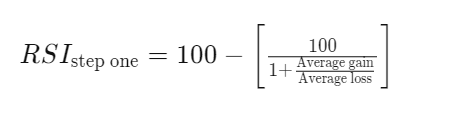

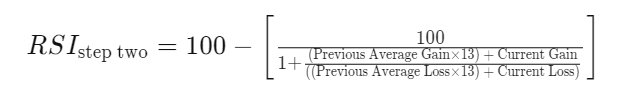

In [78]:
def calculate_rsi(db):

  db['Average_Gain']=np.nan
  db['Average_Loss']=np.nan
  db['RSI']=np.nan

  initial_gain=db['Close'][0]
  initial_loss=0

  for x in range(1,14):
    if db['Close'][x]>=db['Close'][x-1]:
      initial_gain=initial_gain+db['Close'][x]-db['Close'][x-1]
    else:
      initial_loss=initial_loss+db['Close'][x-1]-db['Close'][x]

  db['Average_Gain'][13]=initial_gain/14
  db['Average_Loss'][13]=initial_loss/14
  db['RSI'][13]=100-((100)/(1+(db['Average_Gain'][13]/db['Average_Loss'][13])))

  for x in range(14,len(db)):
    if db['Close'][x]>db['Close'][x-1]:
     db['Average_Gain'][x]=(db['Average_Gain'][x-1]*13+db['Close'][x]-db['Close'][x-1])/14
    else:
      db['Average_Gain'][x]=(db['Average_Gain'][x-1]*13)/14

    if db['Close'][x]<db['Close'][x-1]:
     db['Average_Loss'][x]=(db['Average_Loss'][x-1]*13+db['Close'][x-1]-db['Close'][x])/14
    else:
      db['Average_Loss'][x]=(db['Average_Loss'][x-1]*13)/14

    db['RSI'][x]=100-((100)/(1+(db['Average_Gain'][x]/db['Average_Loss'][x])))

# Plotting Graph

In [62]:
def show_rsi(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")
    axs[0].plot(df1['Close'],label='Close')
    axs[0].legend(loc='upper left')
    axs[0].grid()

    axs[1].plot(df1['RSI'], label='Rsi', color = 'blue')
    axs[1].legend(loc='upper left')
    axs[1].grid()

# **RSI Strategy**
We use a simple strategy to get buy and sell signals using the RSI indicator.

Low RSI levels, typically below 30, indicate oversold conditions—generating a potential buy signal. Conversely, High RSI levels, typically above 70 , indicate overbought conditions—generating a potential sell signal.

In [71]:
def find_returns_rsi(dataset, index):
  #Generating Buy and Sell signals using the MACD strategy
  buy=[]
  sell=[]
  position = False

  for i in range(len(dataset)):
        if dataset.RSI[i]<=30:
            if position == False:
                buy.append(i)
                position = True
        elif dataset.RSI[i]>=70:
            if position == True:
                sell.append(i)
                position = False

  #Calculating the Returns from the Buy and Sell signals generated
  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)
  merged.columns = ['Buy', 'Sell']
  totalprofit = merged.shift(-1).Sell-merged.Buy
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy

  #Printing the Calculated Returns
  str_1 = "The return of "
  str_2 = " is "
  print(str_1,index,str_2,percent_profits.sum(), sep=" ")

# RSI Plots & Returns

The return of  ['^NSEI']  is  0.4449279304748208


The return of  ['000001.SS']  is  0.058238886201353944


The return of  ['^GSPC']  is  0.7440300674669




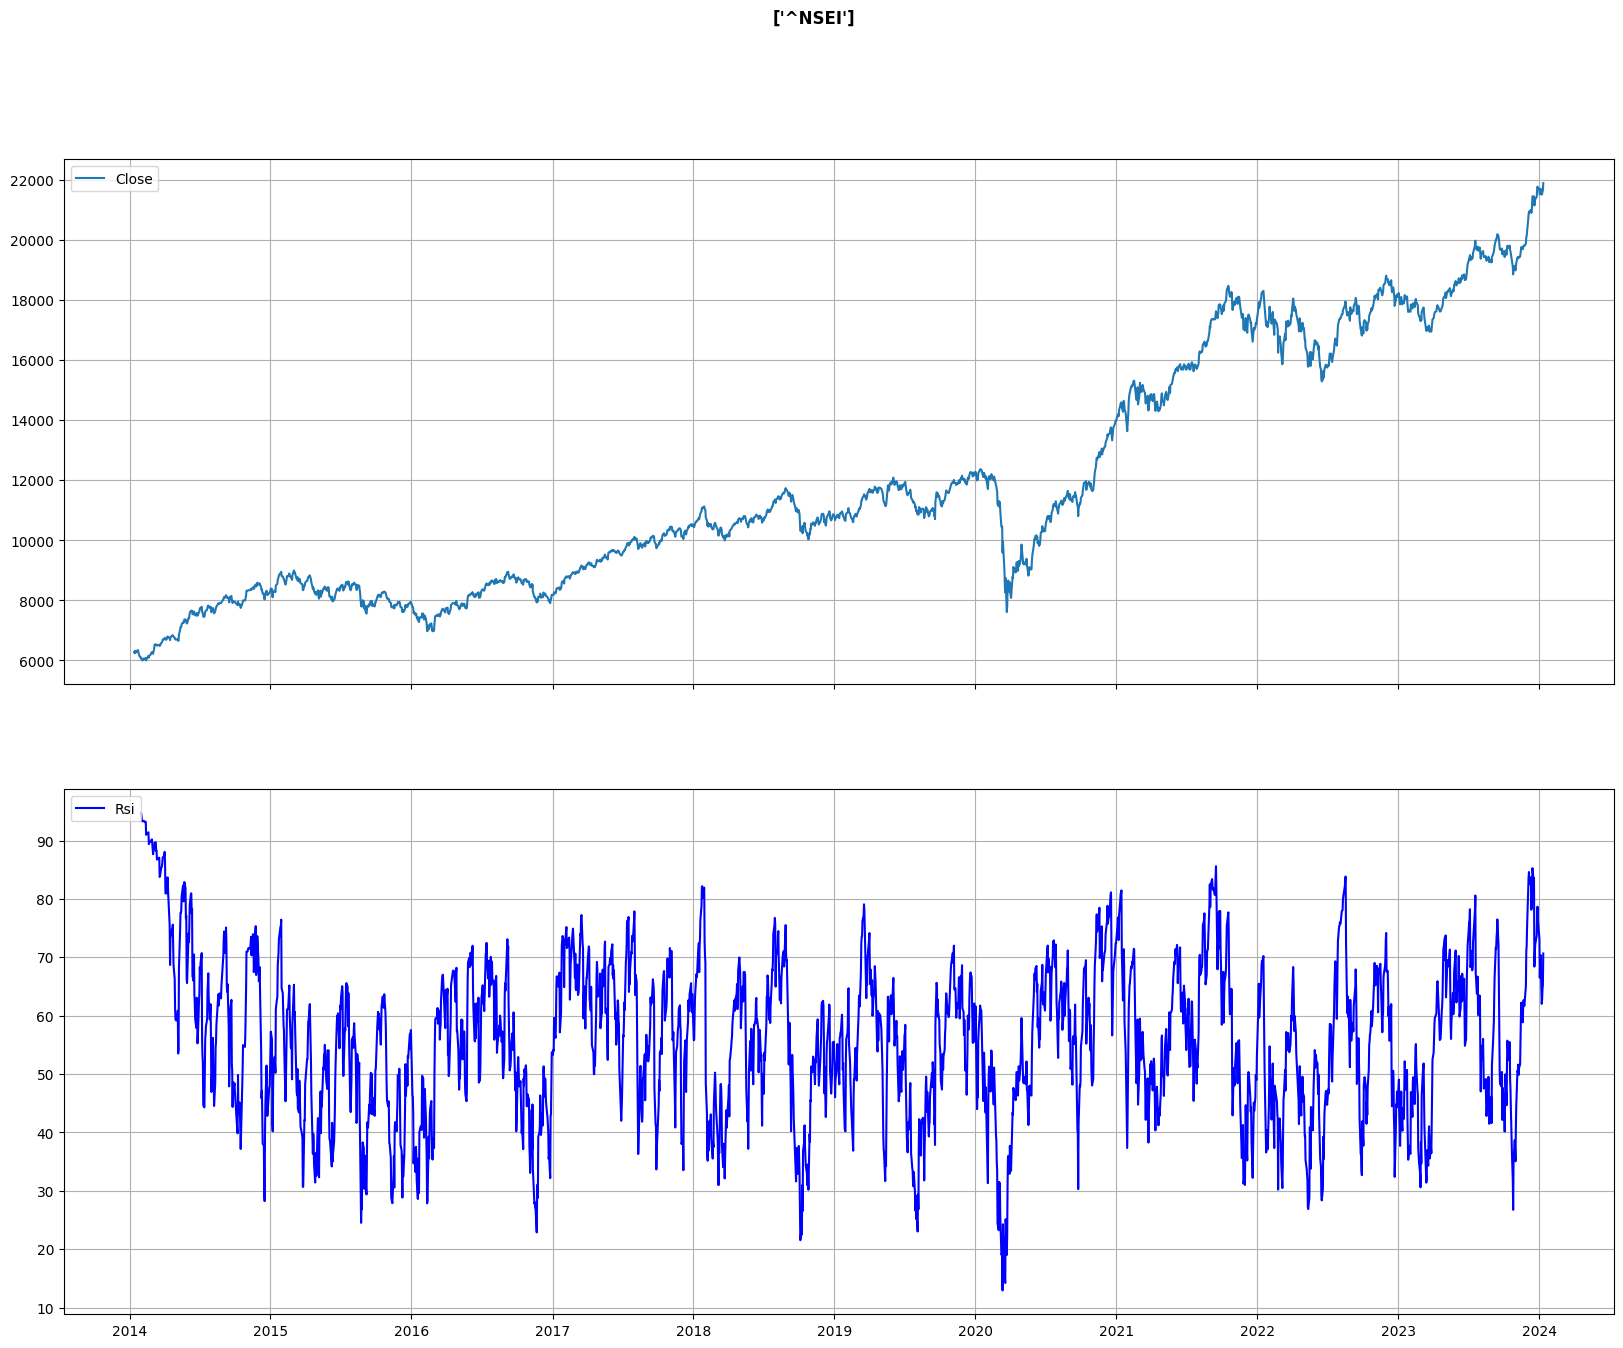

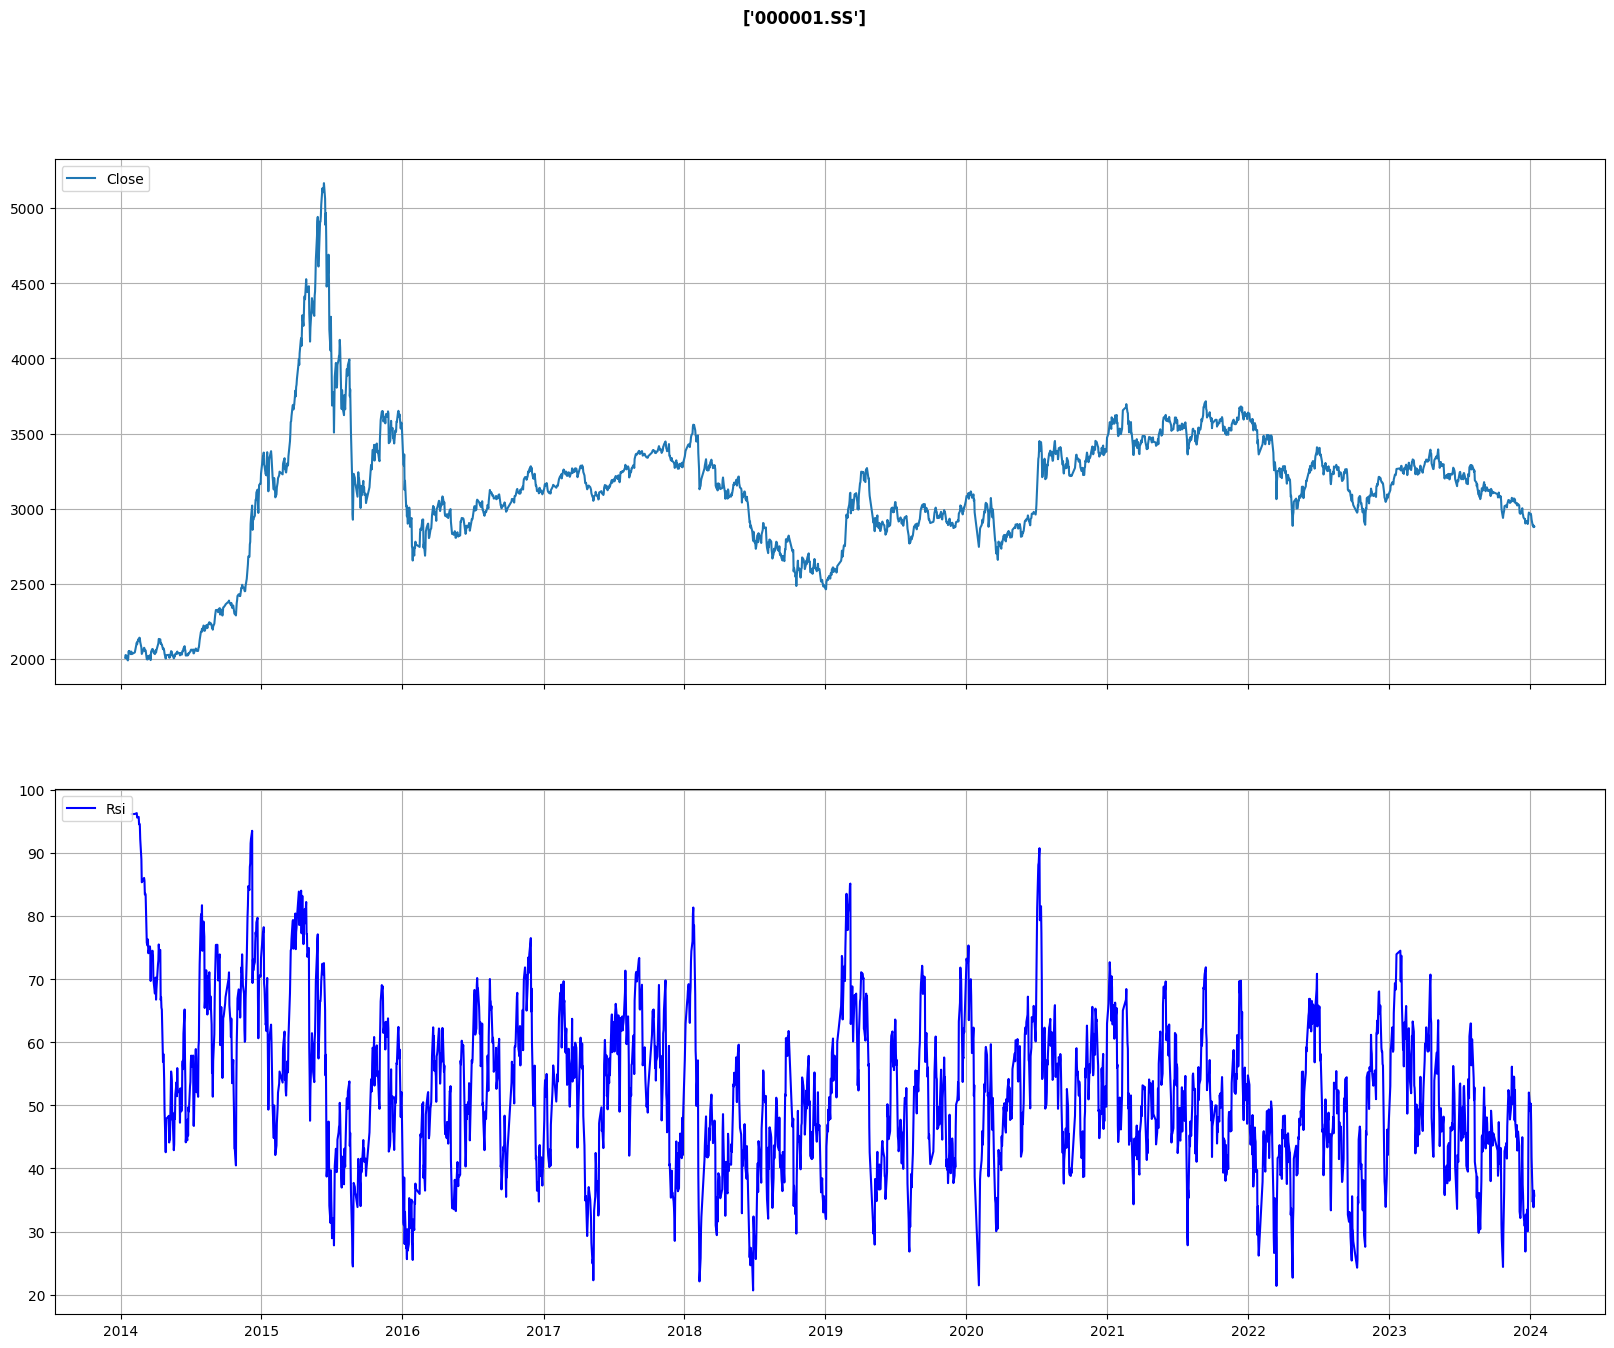

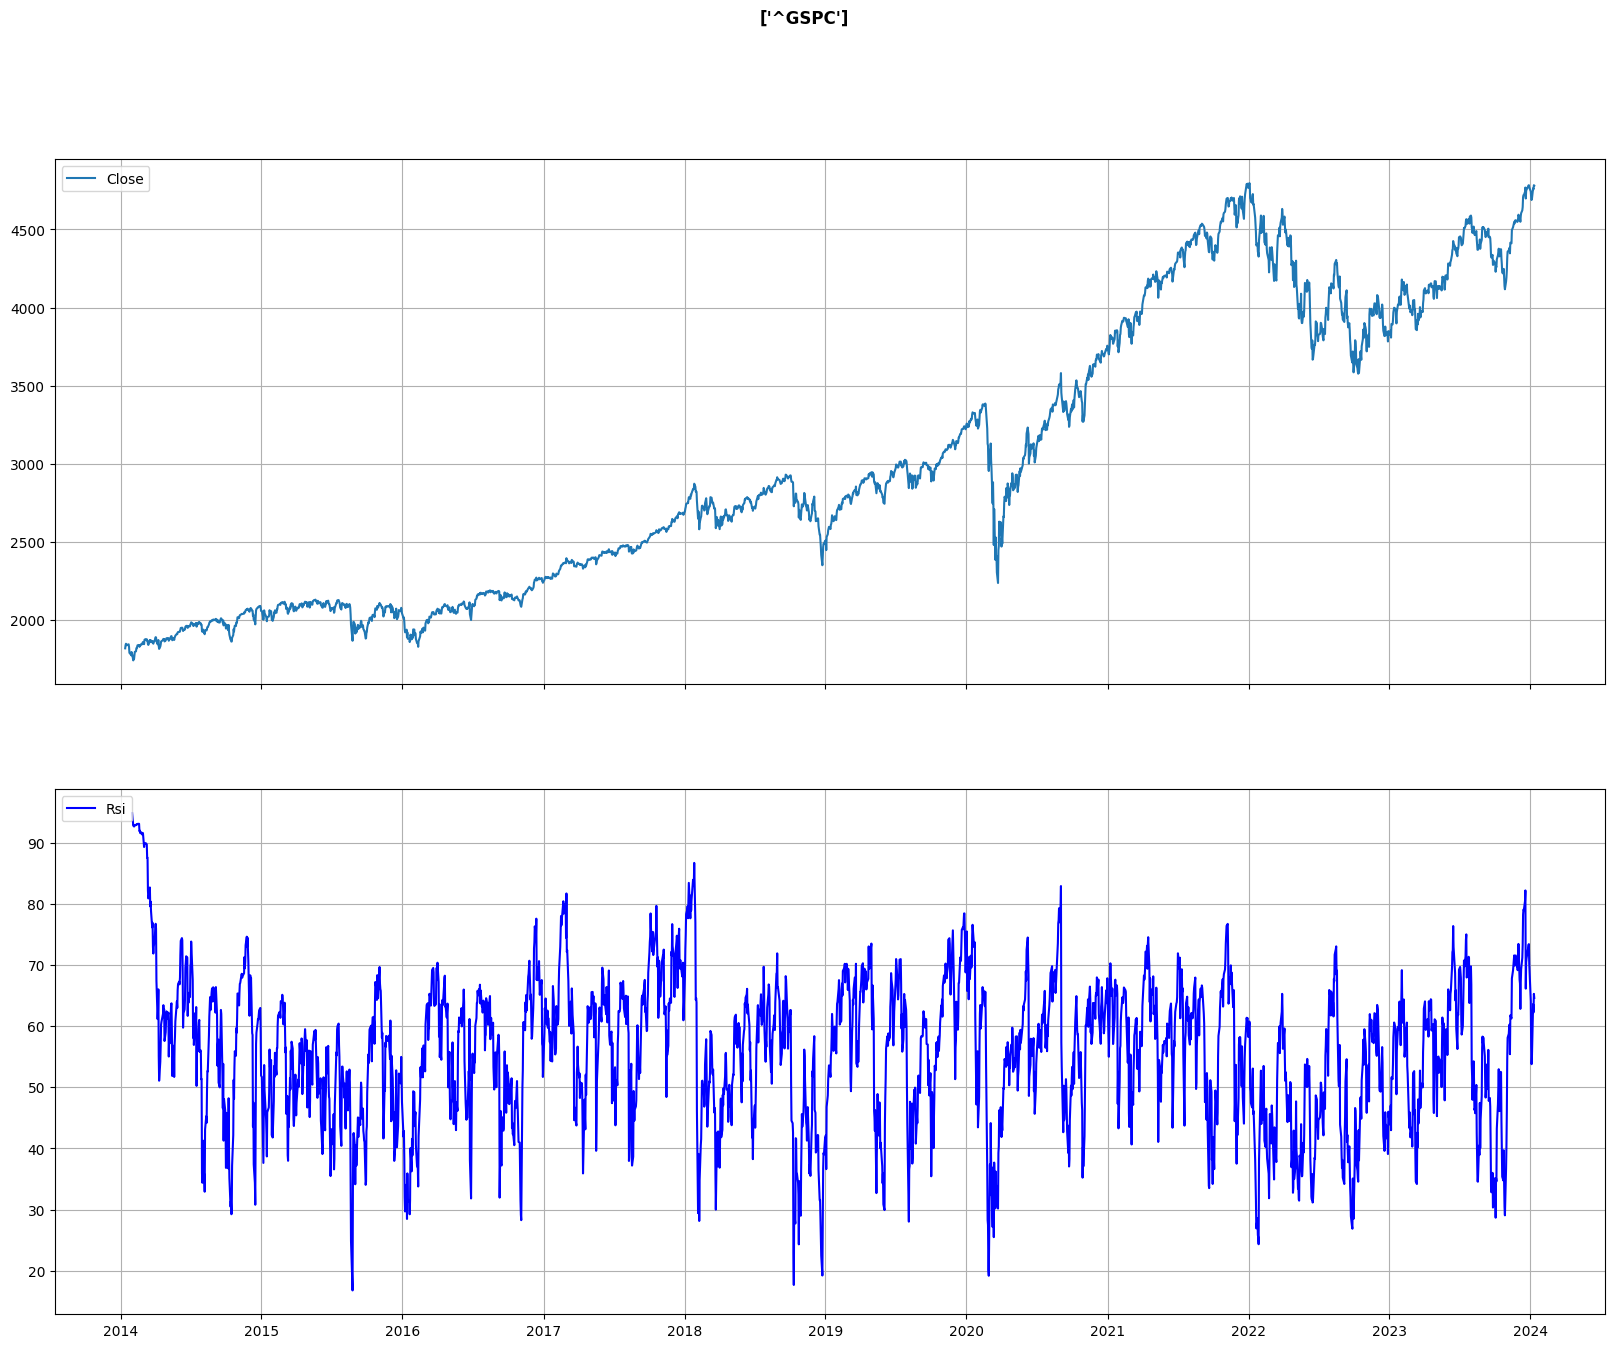

In [74]:
for i in range(0,3):
  db=download_data([indices[i]])
  calculate_rsi(db)
  show_rsi(db,[indices[i]])
  find_returns_rsi(db,[indices[i]])
  print('\n')

# **MACD (Moving Average Convergence Divergence)**

Moving average convergence/divergence (MACD, or MAC-D) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price.

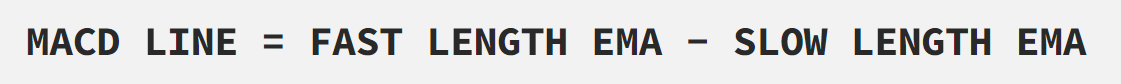

We use the standard slow length - 12 days and fast length - 26 days

## **Calculating MACD and SIGNAL lines**

In [77]:
def macd(dmacd):
    ## Calculate the Short Term Exponential Moving Average
    dmacd['ShortEMA']=dmacd['Close'].ewm(span=12, adjust=False).mean()
    ## Calculate the Long Term Exponential Moving Average
    dmacd['LongEMA']= dmacd['Close'].ewm(span=26, adjust=False).mean()
    ## Calculate the Moving Average Convergence/Divergence (MACD)
    dmacd['MACD'] = dmacd['ShortEMA'] - dmacd['LongEMA']
    ## Calcualte the signal line
    dmacd['signal'] = dmacd['MACD'].ewm(span=9, adjust=False).mean()
    dmacd['hist']= dmacd['MACD'] - dmacd['signal']
    return dmacd

def show_macd(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")
    axs[0].plot(df1['Close'],label='Close')
    axs[0].legend(loc='upper left')
    axs[0].grid()

    axs[1].plot(df1['MACD'], label='MACD', color = 'blue')
    axs[1].plot(df1['signal'], label='Signal Line', color = 'Red')
    axs[1].plot(df1['hist'], label='MACD_hist' ,linestyle='--')
    axs[1].legend(loc='upper left')
    axs[1].grid()

## **MACD STRATEGY**
We use a simple strategy to get buy and sell signals using the MACD indicator.

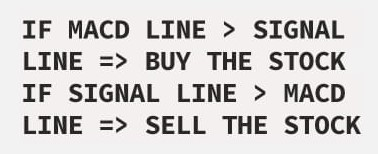

## **Calculating returns using the MACD strategy**

In [76]:
def find_returns_macd(dataset, index):
  #Generating Buy and Sell signals using the MACD strategy
  buy=[]
  sell=[]
  position = False

  for i in range(len(dataset)):
        if dataset.MACD[i]>dataset.signal[i]:
            if position == False:
                buy.append(i)
                position = True
        elif dataset.MACD[i]<dataset.signal[i]:
            if position == True:
                sell.append(i)
                position = False

  #Calculating the Returns from the Buy and Sell signals generated
  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)
  merged.columns = ['Buy', 'Sell']
  totalprofit = merged.shift(-1).Sell-merged.Buy
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy

  #Printing the Calculated Returns
  str_1 = "The return of "
  str_2 = " is "
  print(str_1,index,str_2,percent_profits.sum(), sep=" ")

## **MACD Plots & Returns**

The return of  ^NSEI  is  0.781775326863294


The return of  000001.SS  is  0.6446330611447224


The return of  ^GSPC  is  0.5362172600590123




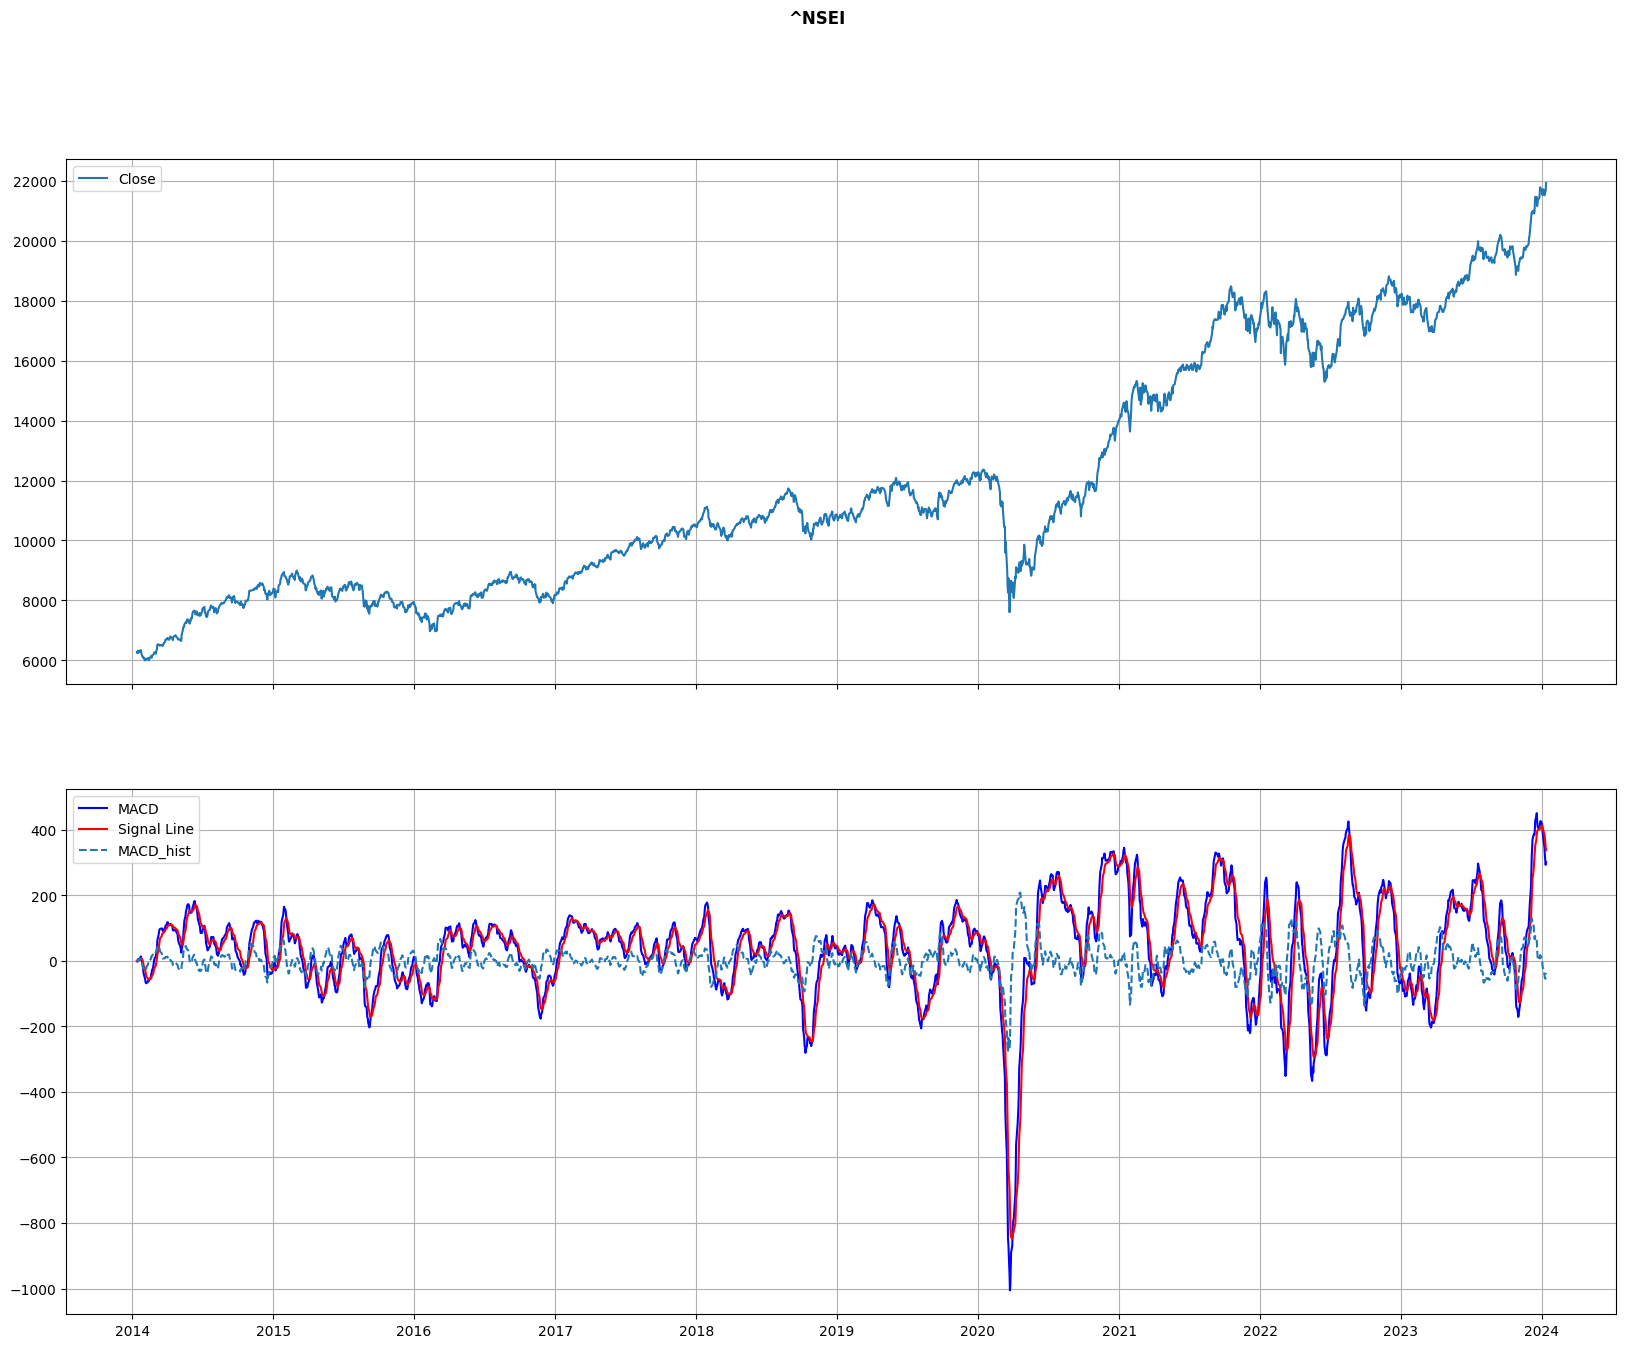

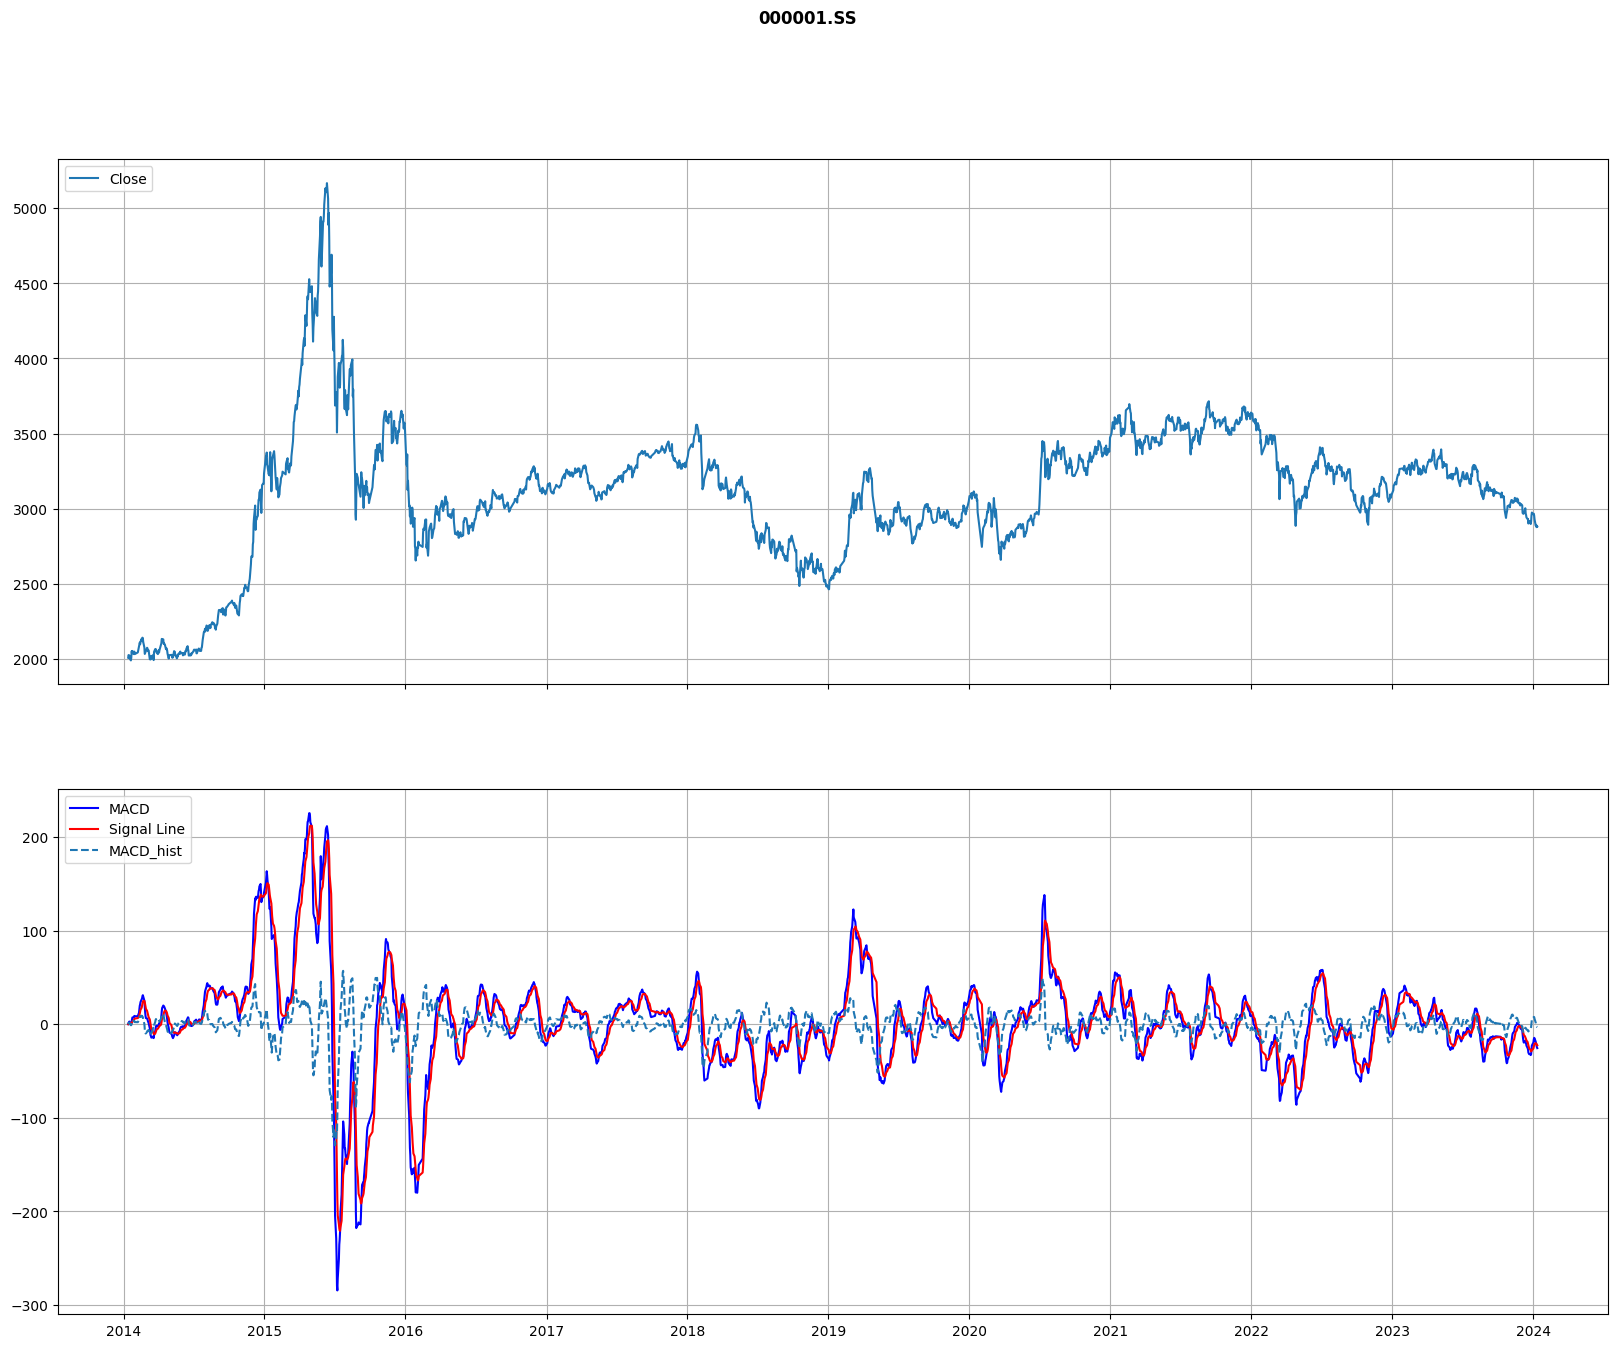

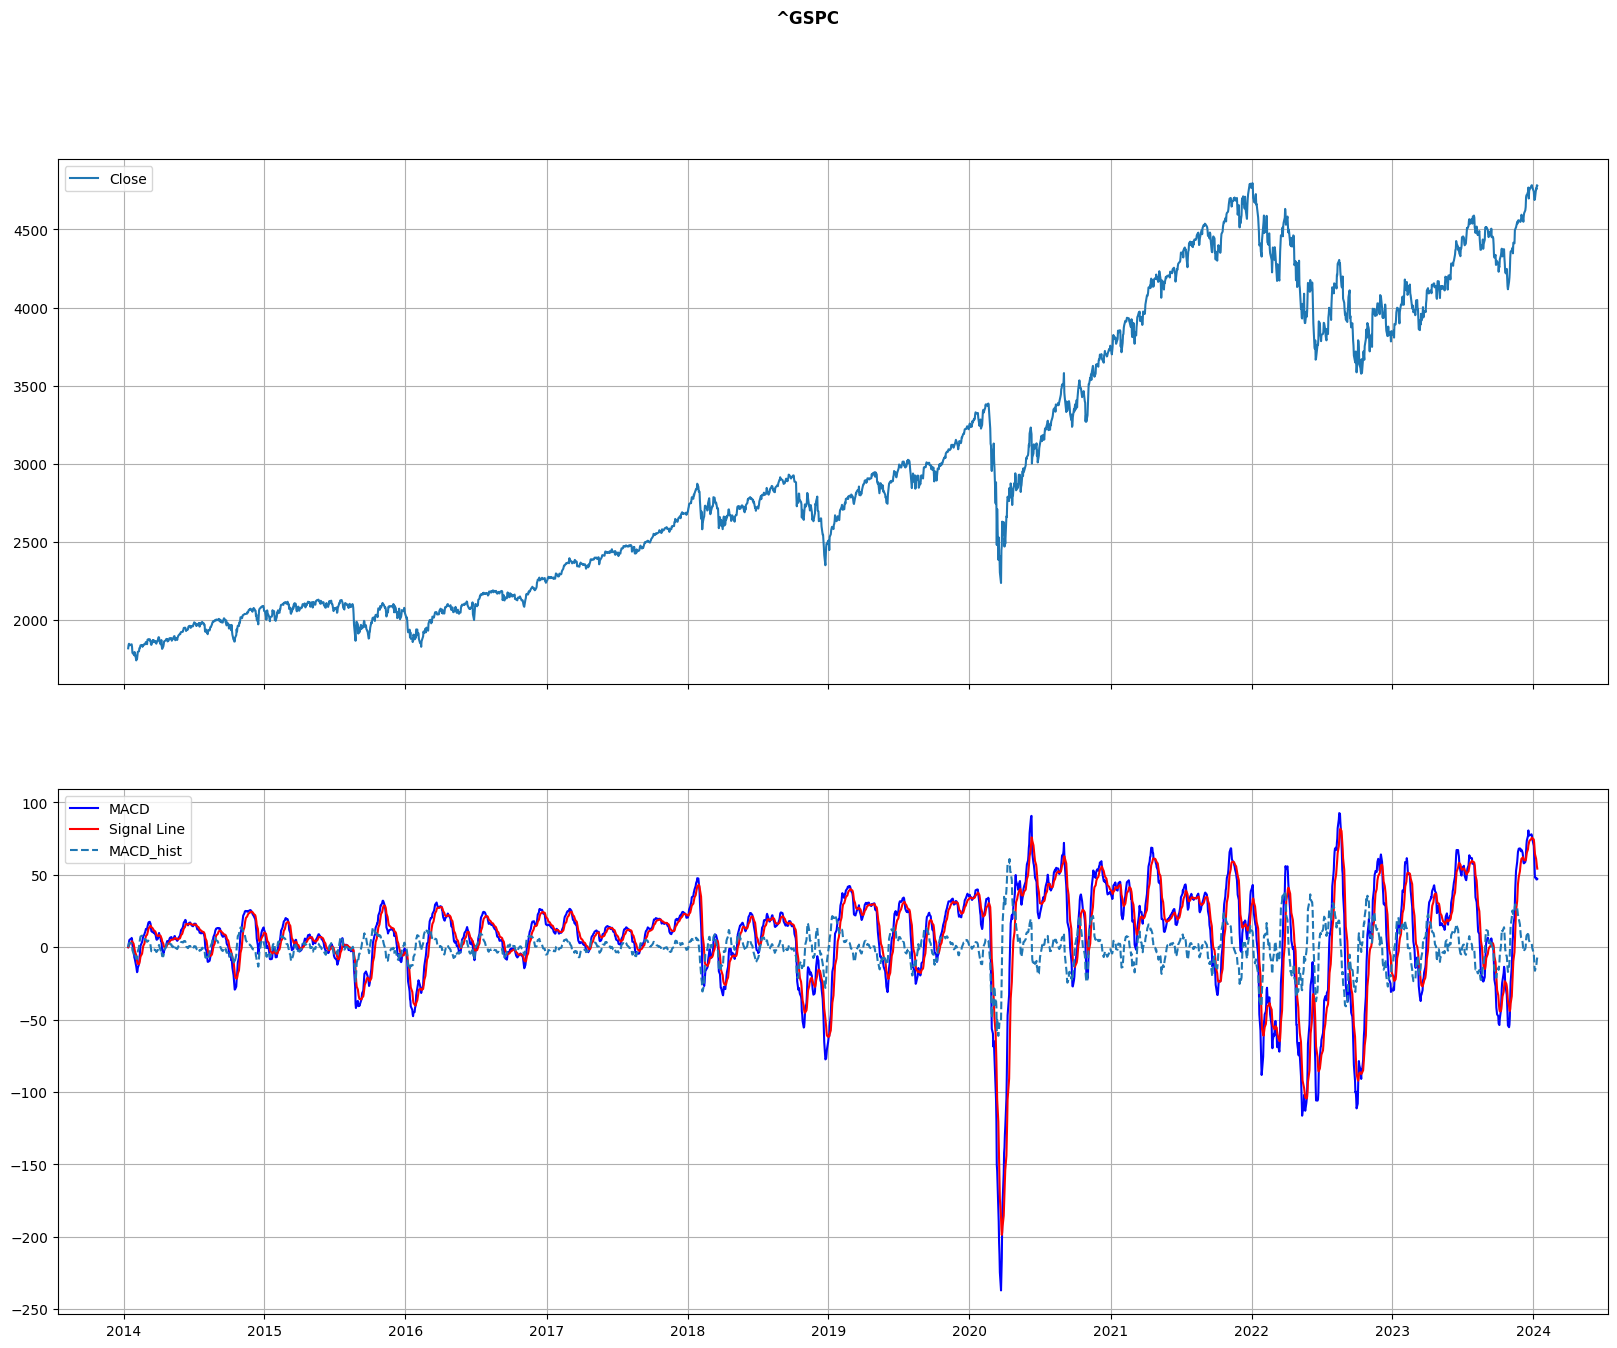

In [9]:
i = 0
for i in range(0,3):
  x = [indices[i]]
  dataset1 = download_data(x)
  macD = macd(dataset1)
  show_macd(macD, indices[i])
  find_returns_macd(dataset1, indices[i])
  print("\n")
  i=i+1

# **Bollinger Bands**

These are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method which display a graphical band (the envelope maximum and minimum of moving averages) and volatility (expressed by the width of the envelope) in one two-dimensional chart.


## **Calculating the Bollinger Bands**
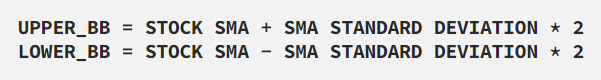

In [75]:
def bb(db):
   db['SMA']=np.nan
   db['STD']=np.nan
   db['BU']=np.nan
   db['BL']=np.nan

   for x in range(15,len(db)):
     db['SMA'][x]=db['Close'][(x-14):x].mean()
     db['STD'][x]=db['Close'][(x-14):x].std()
     db['BU'][x]=(db['SMA'][x]+db['STD'][x]*2)
     db['BL'][x]=(db['SMA'][x]-db['STD'][x]*2)
   return db

def show_bb(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")
    axs[0].plot(df1['Close'],label='Close')
    axs[0].legend(loc='upper left')
    axs[0].grid()
    axs[1].plot(df1['Close'],label='Close')
    axs[1].plot(df1['BU'],label='Upper Band')
    axs[1].plot(df1['BL'],label='Lower Band')
    axs[1].legend(loc='upper left')
    axs[1].grid()
    plt.fill_between (df1.index, df1.BU,df1.BL, color ='grey', alpha = 0.3)

## **B-BANDS Strategy**
We use a simple strategy to get buy and sell signals from the B-Bands indicator.

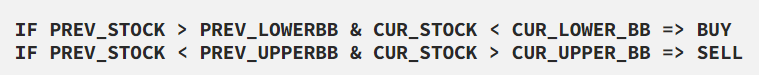

## **Calculating returns using the B-BANDS strategy**

In [12]:
def find_returns_bb(dataset, index):
  buy=[]
  sell=[]
  open_pos = False

  for i in range(len(dataset)):
      if open_pos == False:
       if dataset.BL[i-1] > dataset.Close[i-1]:
         if dataset.BL[i] < dataset.Close[i]:
            buy.append(i)
            open_pos= True
      elif open_pos == True:
        if dataset.BU[i-1] < dataset.Close[i-1]:
          if dataset.BU[i] > dataset.Close[i]:
            sell.append(i)
            open_pos = False


  merged= pd.concat([dataset.iloc[buy].Close , dataset.iloc[sell].Close] , axis=1)
  merged.columns = ['Buy', 'Sell']
  totalprofit = merged.shift(-1).Sell-merged.Buy
  percent_profits = (merged.shift(-1).Sell-merged.Buy) / merged.Buy

  str_1 = "The return of "
  str_2 = " is "
  print(str_1,index,str_2,percent_profits.sum(), sep=" ")

## **B-BANDS Plots & Returns**

The return of  ^NSEI  is  0.5648486563786042


The return of  000001.SS  is  0.11801410183424496


The return of  ^GSPC  is  1.0012369345691279




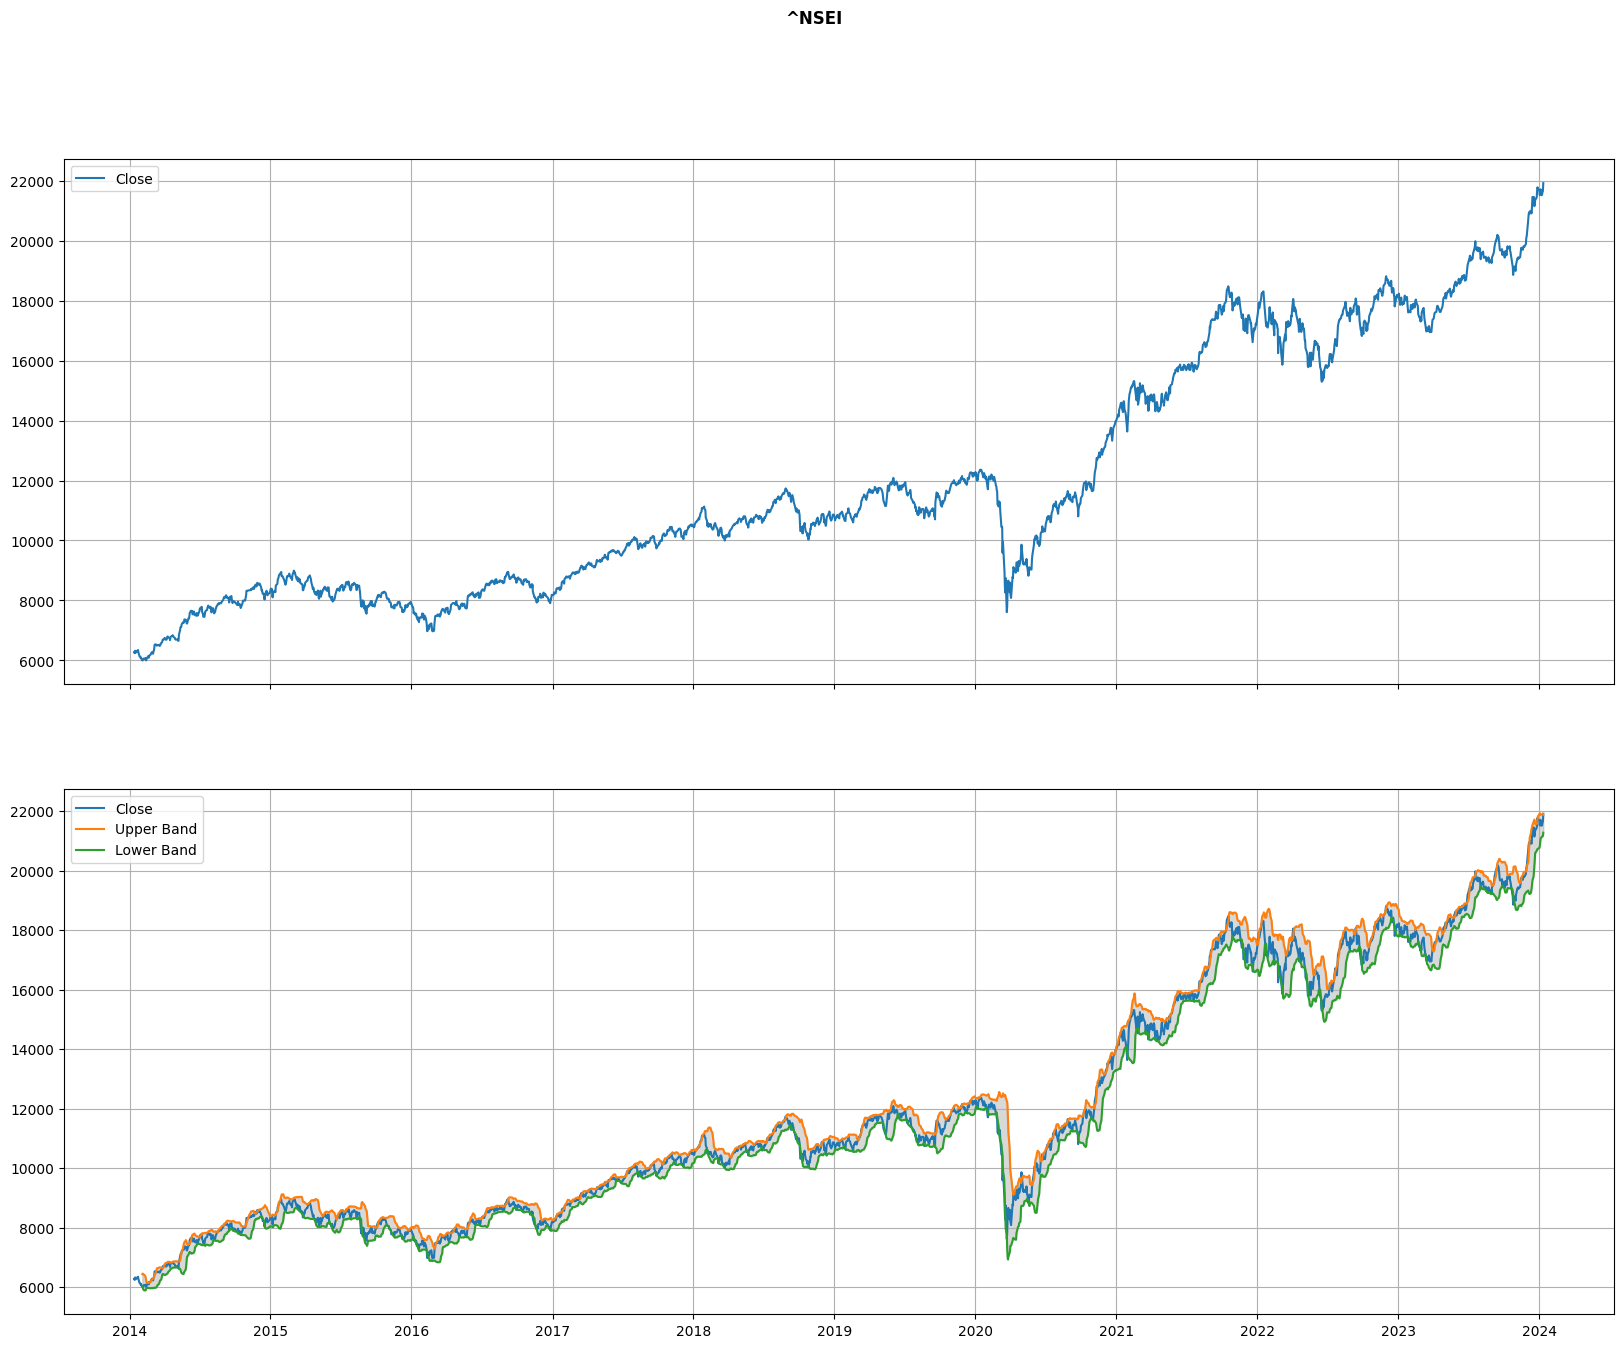

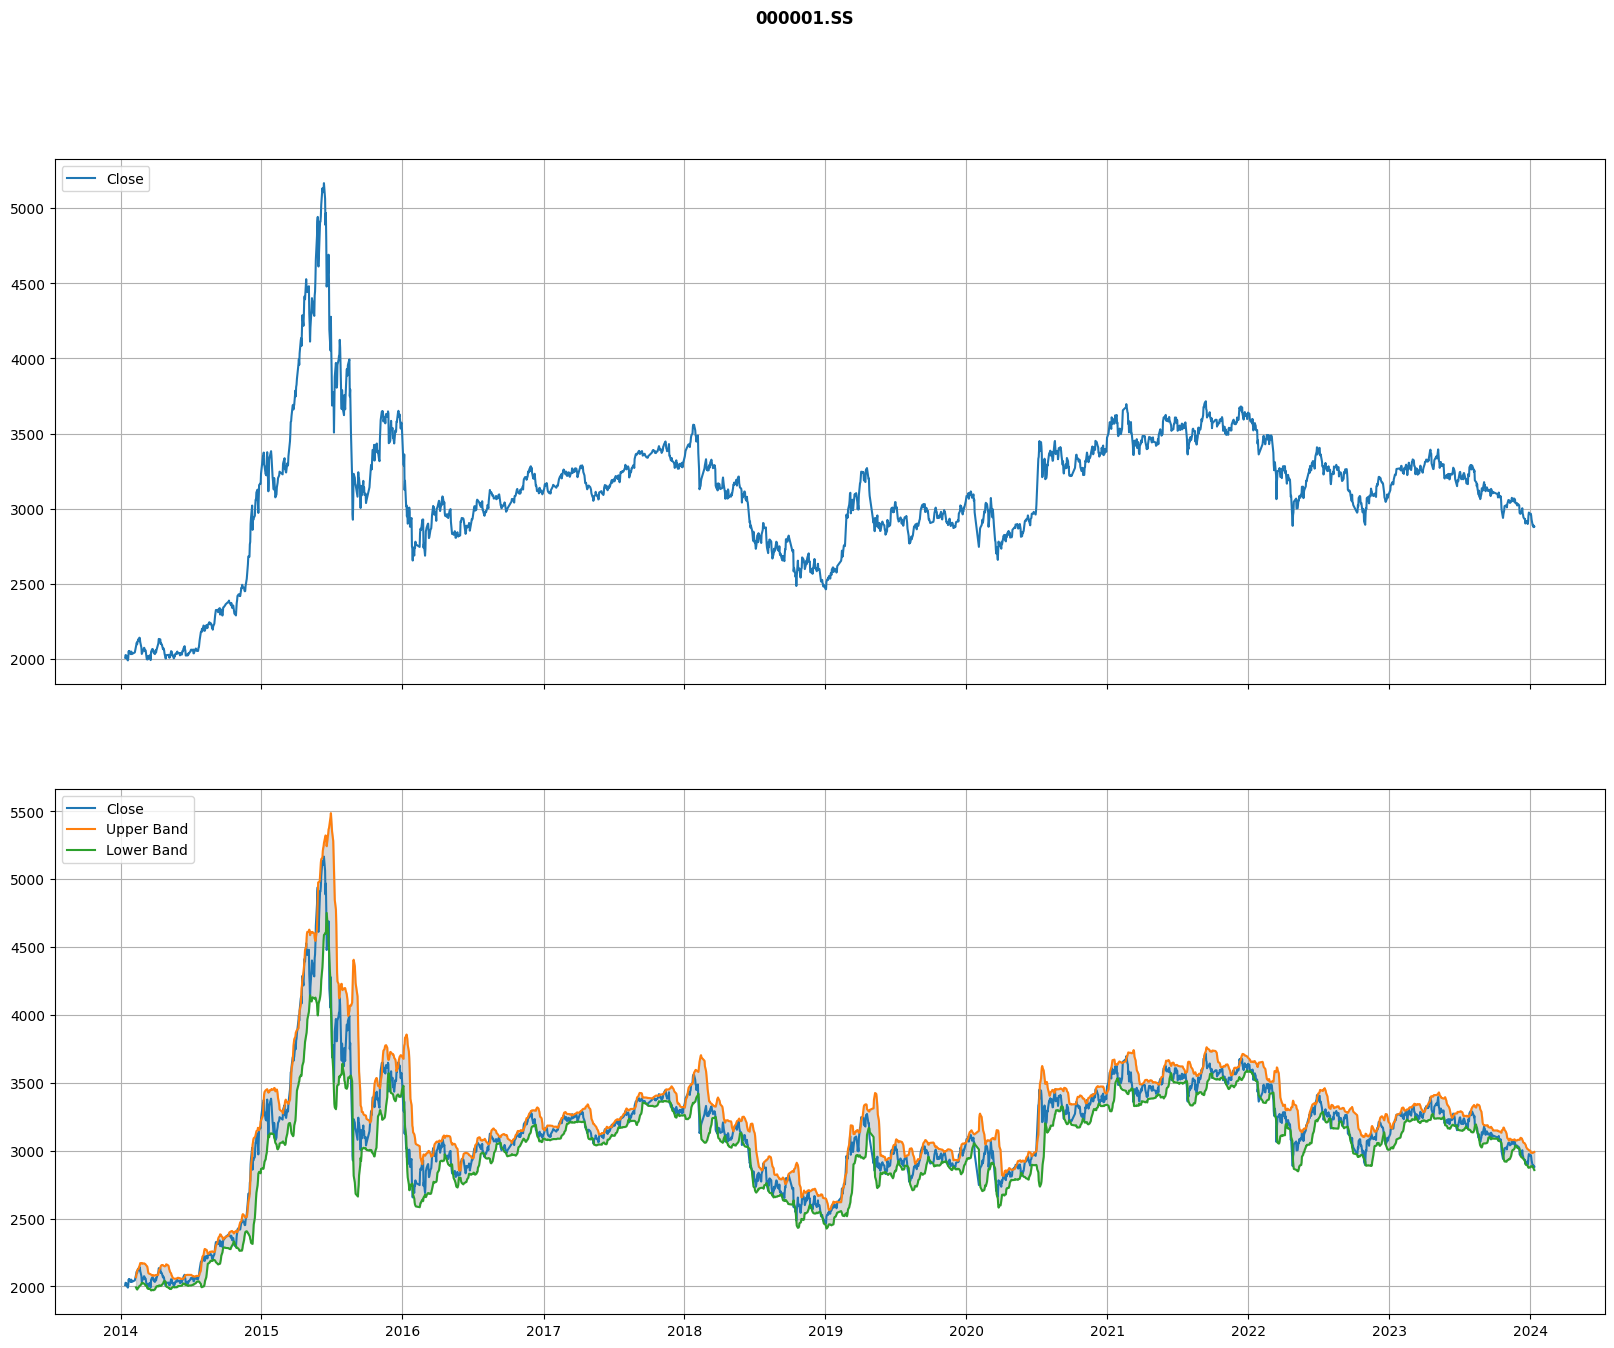

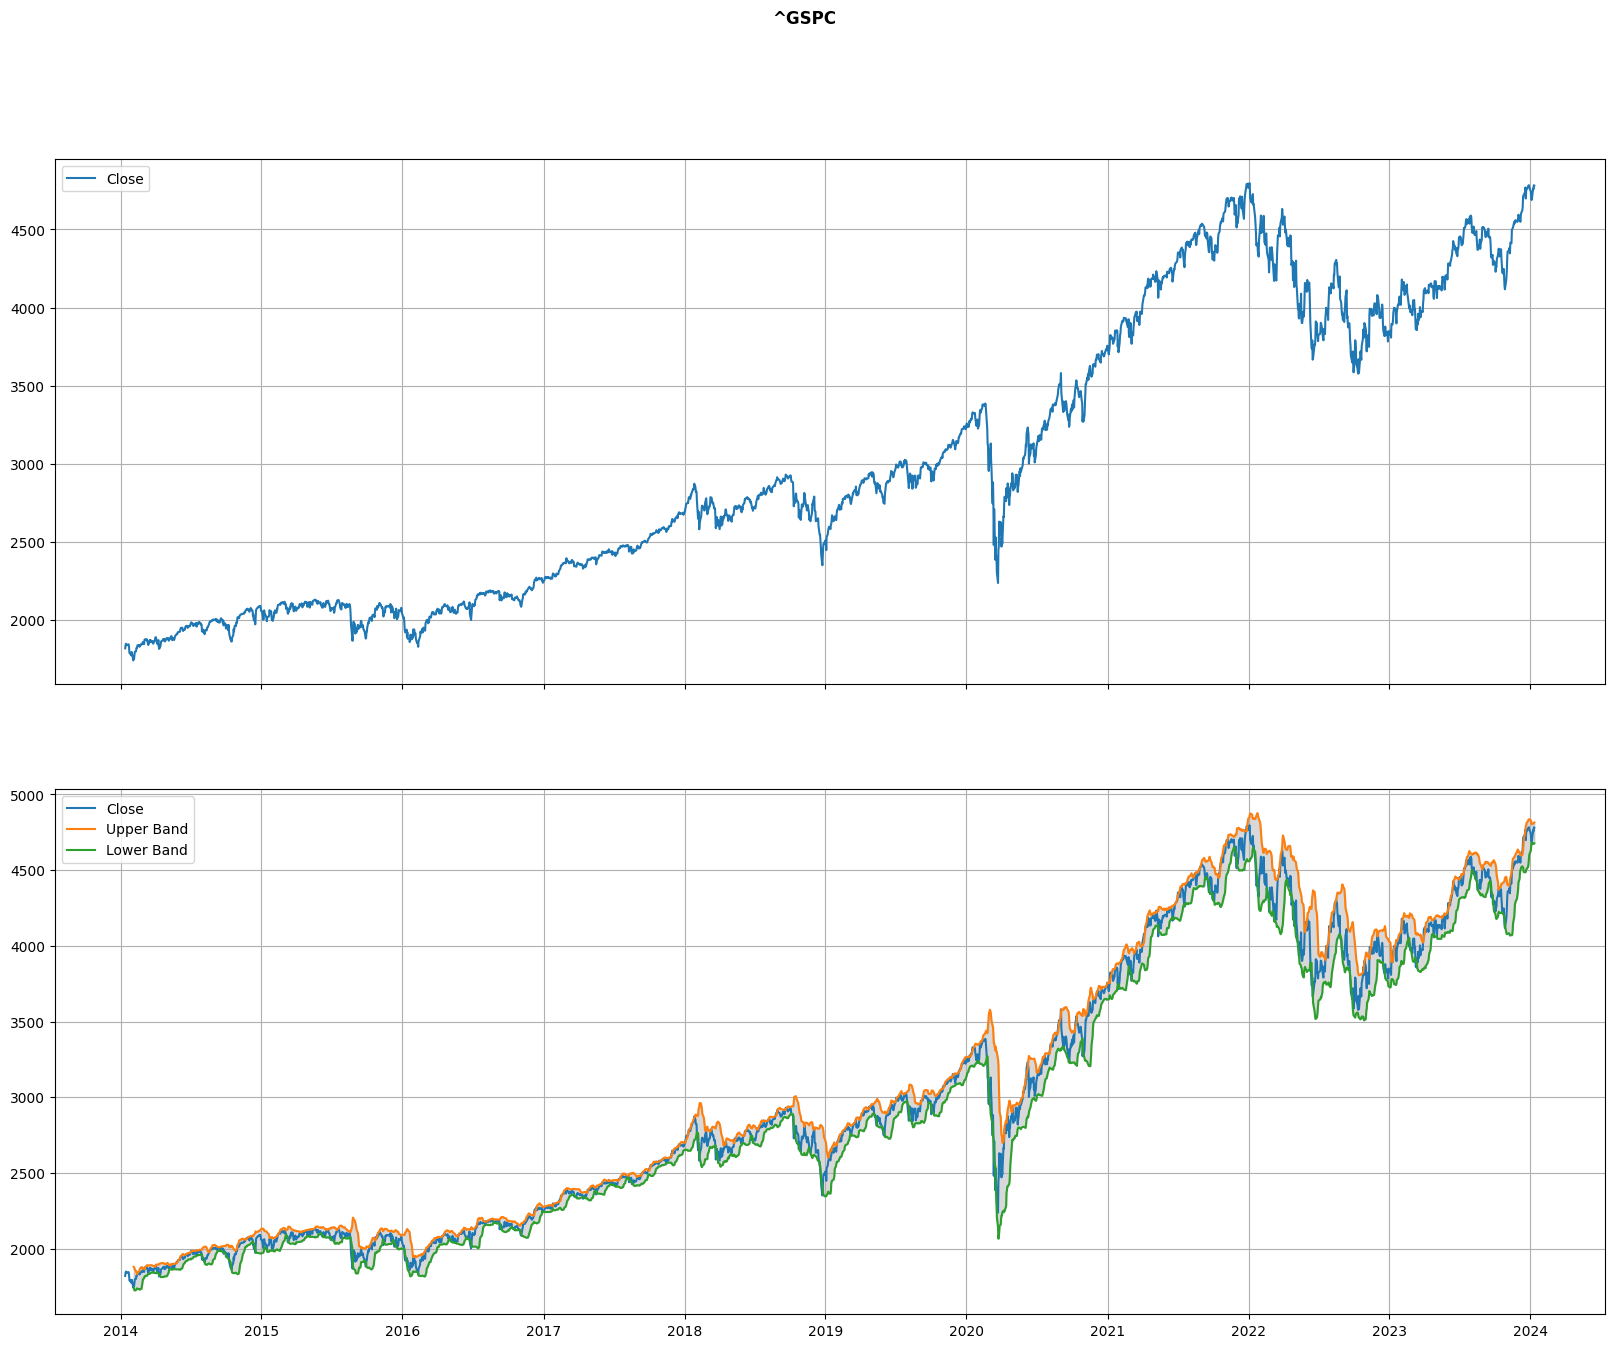

In [13]:
i = 0
for indeX in indices:
  x = [indices[i]]
  dataset2 = download_data(x)
  bB = bb(dataset2)
  show_bb(bB, indices[i])
  find_returns_bb(dataset2, indices[i])
  print("\n")
  i=i+1

## **MIXED STRATEGY**
Here we have used both the indicators we saw above and used them simultaneously to make a mixed strategy. The strategy implemented in this code buys when the closing price of the asset is above the middle line of the Bollinger Bands, and the MACD is above the signal line. It gives a sell signal using the same B-Bands strategy we used above. We then evaluate the performance of the strategy by calculating the profits. The total profit is calculated by subtracting the closing price at the sell signal from the closing price at the buy signal and the percentage profit by dividing the total profit by the closing price at the buy signal.


In [14]:
#dataset1 - MACD dataset
#dataset2 - BB dataset

def mixed_strategy(dataset1, dataset2, index):

  buy = []
  sell = []

  open_pos = False

  for i in range(len(dataset2)):

    if open_pos == False:
      # If the closing price is above the middle line of the Bollinger Bands
      # and the MACD is above the signal line, then generate a buy signal
      if dataset2.Close[i] > (dataset2.BU[i] + dataset2.BL[i]) / 2:
        if dataset1.MACD[i] > dataset1.signal[i]:
          buy.append(i)
          open_pos = True

    elif open_pos == True:
      # If the upper line of the Bollinger Bands is crossed downwards and
      # the closing price is below the middle line, then generate a sell signal
      if dataset2.BU[i - 1] < dataset2.Close[i - 1]:
        if dataset2.BU[i] > dataset2.Close[i]:
          sell.append(i)
          open_pos = False

  merged = pd.concat([dataset1.iloc[buy].Close, dataset1.iloc[sell].Close], axis=1)
  merged.columns = ['Buy', 'Sell']
  totalprofit = merged.shift(-1).Sell - merged.Buy
  percent_profits = (merged.shift(-1).Sell - merged.Buy) / merged.Buy

  str_1 = "The return of "
  str_2 = " is "
  print(str_1,index,str_2,percent_profits.sum(), sep=" ")

In [15]:
i = 0

for index in indices:

  x = [indices[i]]
  dataset1 = download_data(x)
  macD = macd(dataset1)

  dataset2 = download_data(x)
  bB = bb(dataset2)

  mixed_strategy(dataset1, dataset2, indices[i])
  print('\n')

  i = i + 1

The return of  ^NSEI  is  1.1563194661259373


The return of  000001.SS  is  0.532366917955583


The return of  ^GSPC  is  1.0713865319340252


